## Problem Statement:
Categorise the countries using some socio-economic and health factors that determine the overall development of the country and provide a list of Top 5 countries which are in dire need of aid based on the analysis.

## **Step 1: Data understanding and preparation**


Reading and understanding the data


In [0]:
#Importing necessary libary to prevent warnings
import warnings
warnings.filterwarnings('ignore')

#Importing necessary libaries for analysis
import numpy as np
import pandas as pd

#Importing necessary libraries for building Knn model
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree
#Importing necessary libaries for reading files
import io 
from google.colab import files 

#Importing necessary libaries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

In [0]:
#Importing necessary libaries for building linear regression model
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [116]:
#reading the csv data into a data frame
uploaded = files.upload()

Saving Country-data.csv to Country-data (1).csv


In [0]:
df1=pd.read_csv(io.BytesIO(uploaded['Country-data.csv']))

In [121]:
#read the data
df = pd.read_csv(io.BytesIO(uploaded['Country-data.csv']))

print(f'The shape of bike_data is {df.shape}')
#seeing the first few rows using head()
df.head()

The shape of bike_data is (167, 10)


,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [122]:
#getting info of the frame using the info()
df.info()
df['country'].value_counts()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   country     167 non-null    object 
 1   child_mort  167 non-null    float64
 2   exports     167 non-null    float64
 3   health      167 non-null    float64
 4   imports     167 non-null    float64
 5   income      167 non-null    int64  
 6   inflation   167 non-null    float64
 7   life_expec  167 non-null    float64
 8   total_fer   167 non-null    float64
 9   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 13.2+ KB


Israel          1
Cameroon        1
Chile           1
Bolivia         1
Angola          1
               ..
Sierra Leone    1
South Korea     1
Montenegro      1
Costa Rica      1
Yemen           1
Name: country, Length: 167, dtype: int64

In [51]:
#getting the statistical summary using describe()
df.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


In [0]:
#We will try to cluster the data into some similar types of country
df.drop('country', axis = 1, inplace = True)

In [124]:
#checking to see if there are any null values in the dataframe
df.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

In [125]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [126]:
#Checking duplicated data in the dayaframe
duplicateRowsDF = df[df.duplicated()]
print("Duplicate Rows except first occurrence based on all columns are :")
print(duplicateRowsDF)
#we can say no rows are duplicated

Duplicate Rows except first occurrence based on all columns are :
Empty DataFrame
Columns: [child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp]
Index: []


**Now, we need to re-create a import, export and health columns, without this we will not be able to make necessary conclusions or we will not be able to
identify that which observation goes to which cluster**


In [0]:
df['exports']=df['exports']/100*df['gdpp']

In [0]:
df['imports']=df['imports']/100*df['gdpp']

In [0]:
df['health']=df['health']/100*df['gdpp']

In [130]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610,9.44,56.2,5.82,553
1,16.6,1145.20,267.8950,1987.740,9930,4.49,76.3,1.65,4090
2,27.3,1712.64,185.9820,1400.440,12900,16.10,76.5,2.89,4460
3,119.0,2199.19,100.6050,1514.370,5900,22.40,60.1,6.16,3530
4,10.3,5551.00,735.6600,7185.800,19100,1.44,76.8,2.13,12200


From the above command we can conclude that there are no null values in the data and data quality is good and clean

# Exploratory data analysis on the data (EDA)


In [131]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 167 entries, 0 to 166
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   child_mort  167 non-null    float64
 1   exports     167 non-null    float64
 2   health      167 non-null    float64
 3   imports     167 non-null    float64
 4   income      167 non-null    int64  
 5   inflation   167 non-null    float64
 6   life_expec  167 non-null    float64
 7   total_fer   167 non-null    float64
 8   gdpp        167 non-null    int64  
dtypes: float64(7), int64(2)
memory usage: 11.9 KB


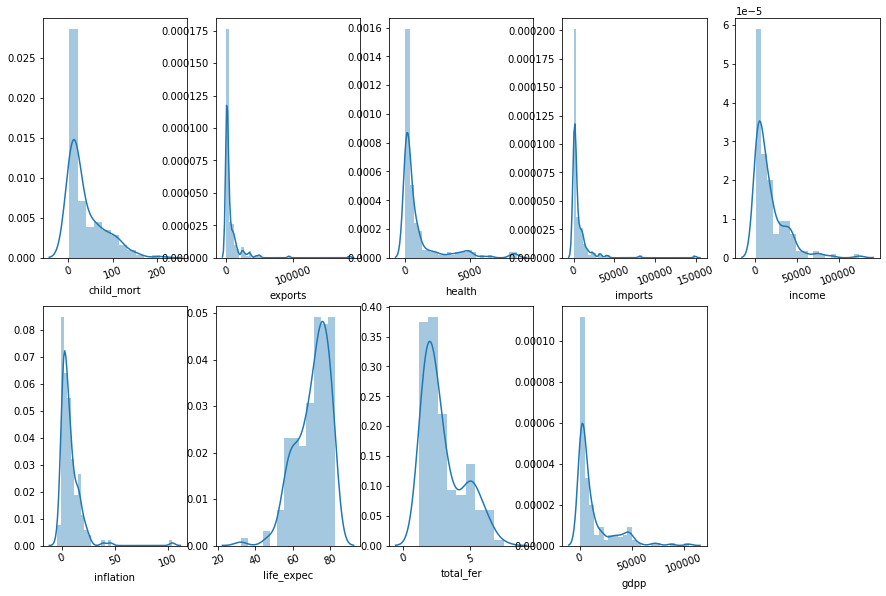

In [133]:
plt.figure(figsize=(15,15))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(3, 5, i[0]+1)
    sns.distplot(df[i[1]])
    plt.xticks(rotation = 20)

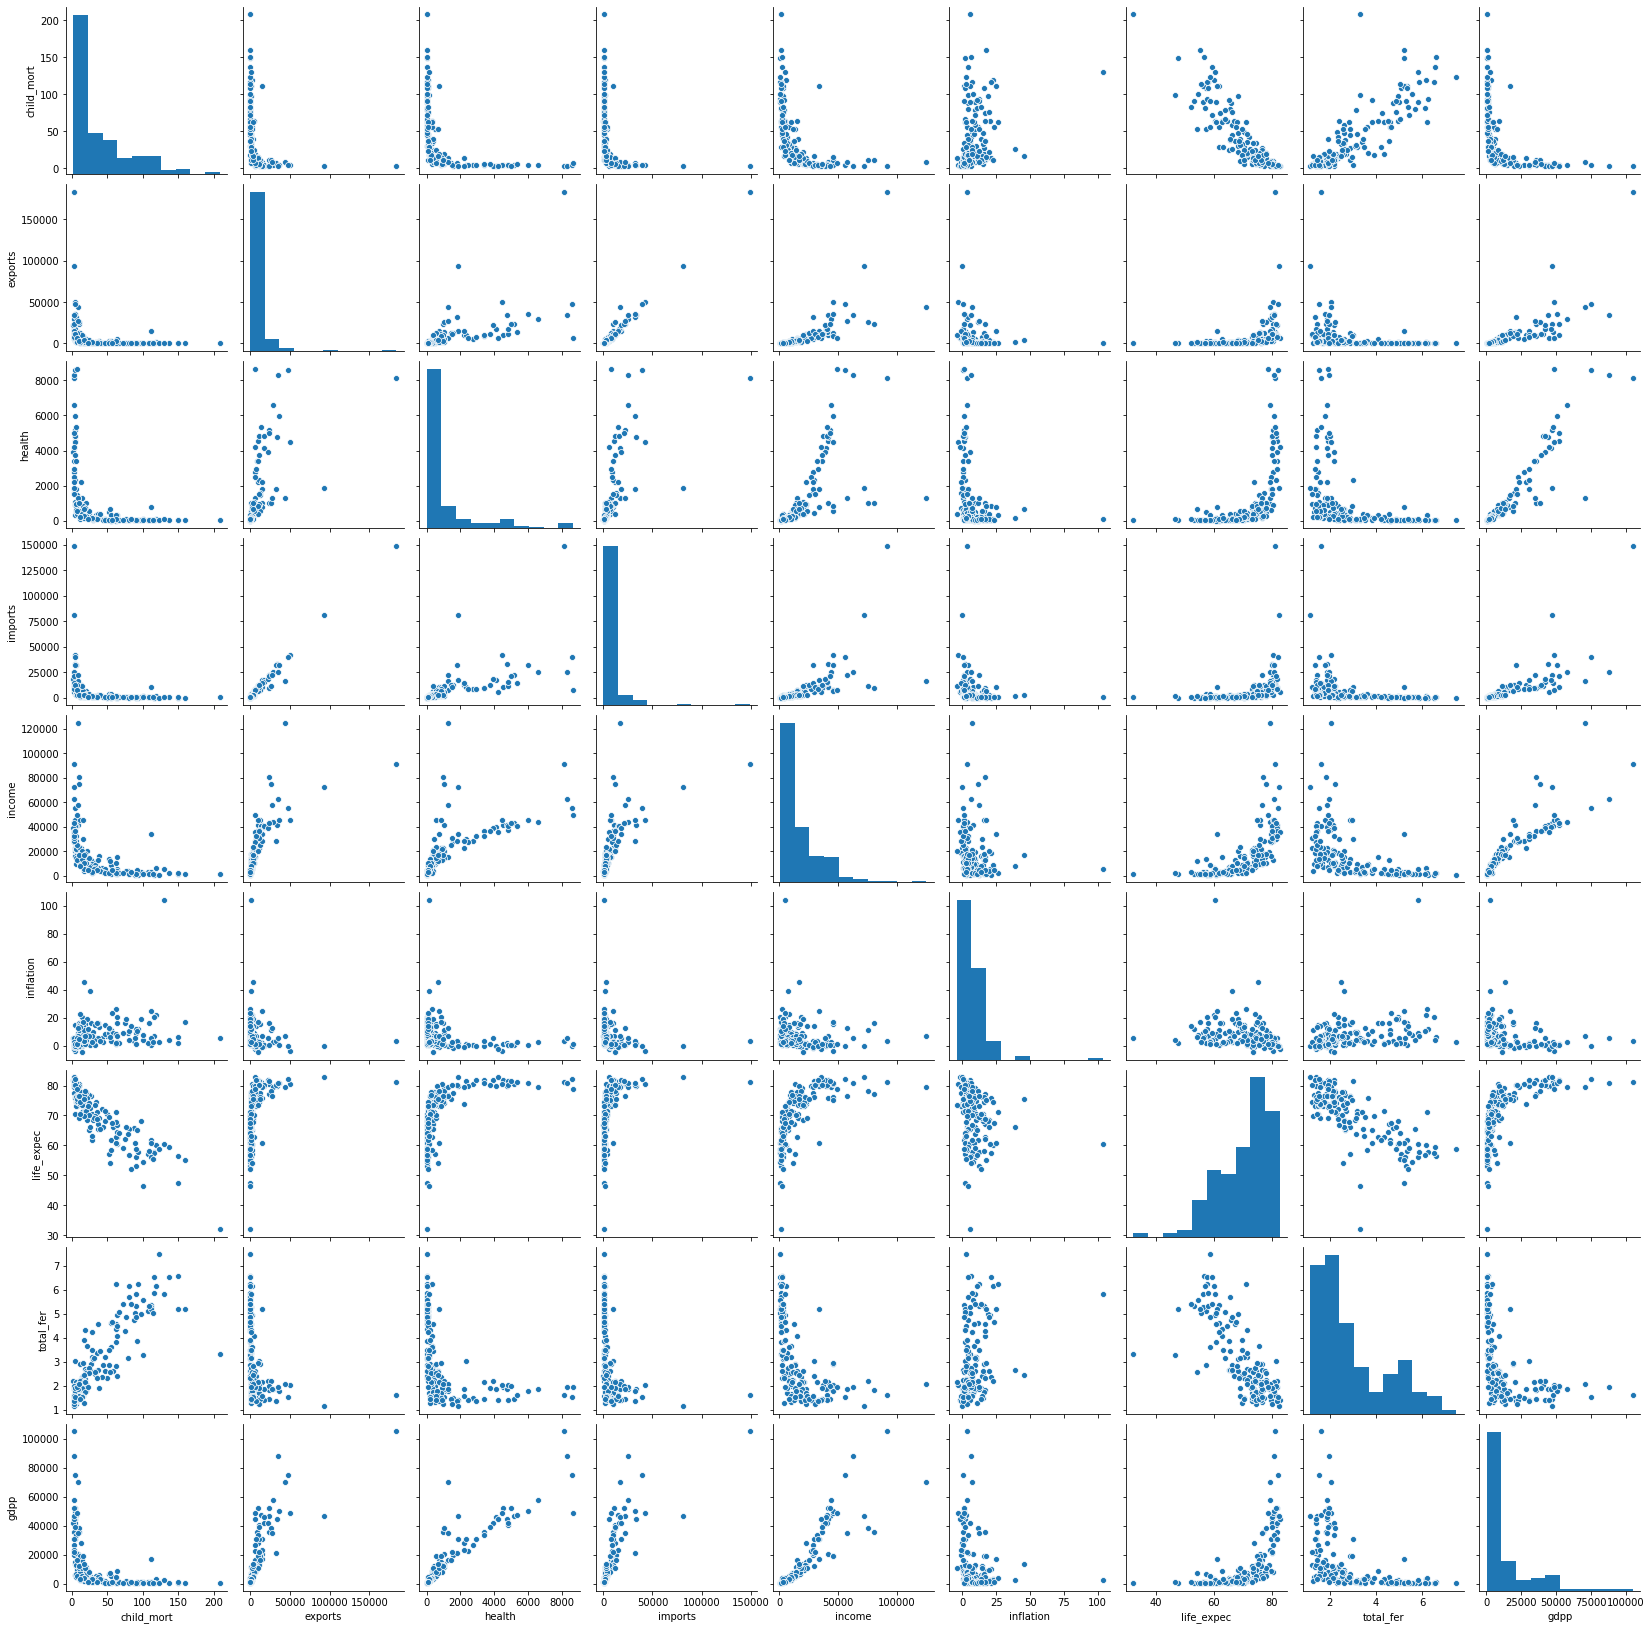

In [134]:
#lets create a pairplot on the numerial datatype columns present in the  data
sns.pairplot(df[['child_mort',	'exports'	,'health',	'imports'	,'income',	'inflation','life_expec',	'total_fer',	'gdpp']])
plt.show()

# Outlier Treatment

ValueError: ignored

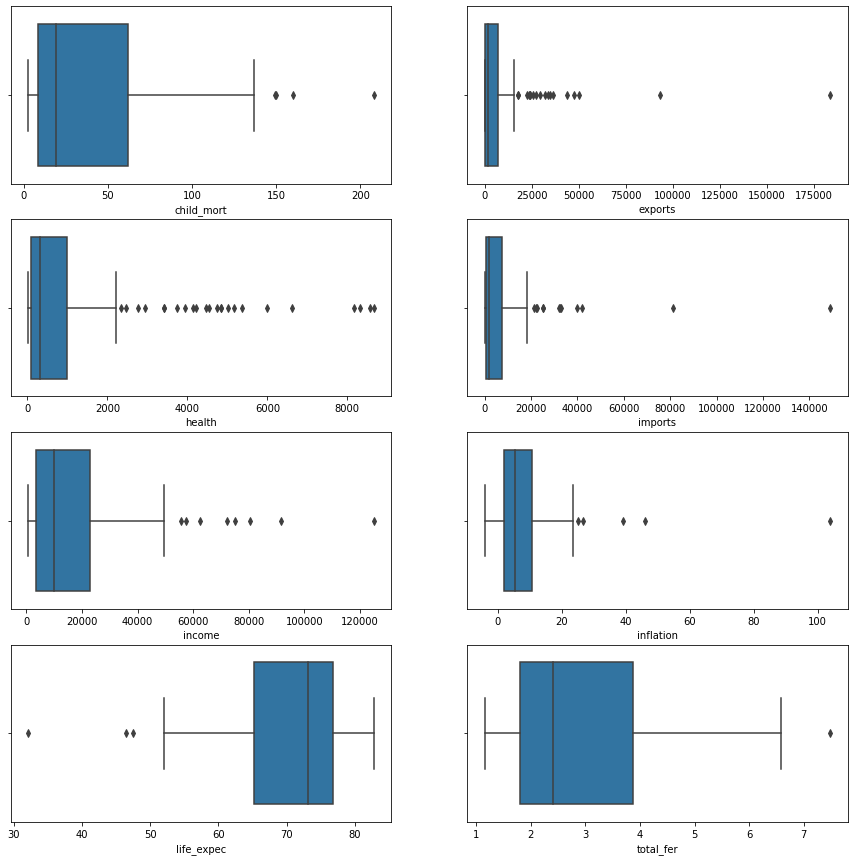

In [135]:
plt.figure(figsize=(15,15))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=df)
    #plt.xticks(rotation = 20)

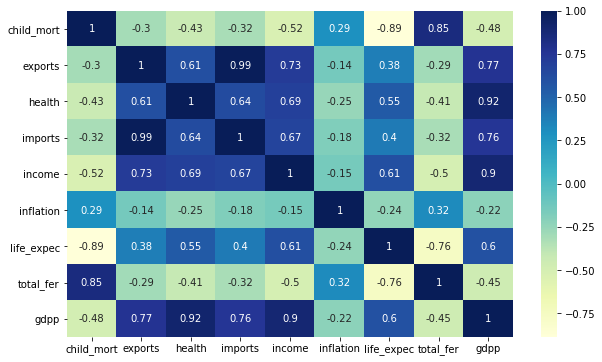

In [136]:
#lets do a heat map for the data correlation
plt.figure(figsize=(10,6))
sns.heatmap(df.corr(),annot=True,cmap='YlGnBu')
plt.show()

In [137]:
# removing (statistical) outliers of child_mort
Q1 = df['child_mort'].quantile(0.01)
Q4 = df['child_mort'].quantile(0.99)
df['child_mort'][df['child_mort'] <= Q1]=Q1
df['child_mort'][df['child_mort'] >= Q4]=Q4
df.shape

(167, 9)

In [138]:
# removing (statistical) outliers of exports
Q1 = df['exports'].quantile(0.01)
Q4 = df['exports'].quantile(0.99)
df['exports'][df['exports'] <= Q1]=Q1
df['exports'][df['exports'] >= Q4]=Q4
df.shape

(167, 9)

In [139]:
# removing (statistical) outliers of health
Q1 = df['health'].quantile(0.01)
Q4 = df['health'].quantile(0.99)
df['health'][df['health'] <= Q1]=Q1
df['health'][df['health'] >= Q4]=Q4
df.shape

(167, 9)

In [140]:
# removing (statistical) outliers of imports
Q1 = df['imports'].quantile(0.01)
Q4 = df['imports'].quantile(0.99)
df['imports'][df['imports'] <= Q1]=Q1
df['imports'][df['imports'] >= Q4]=Q4
df.shape

(167, 9)

In [141]:
# removing (statistical) outliers of income
Q1 = df['income'].quantile(0.01)
Q4 = df['income'].quantile(0.99)
df['income'][df['income'] <= Q1]=Q1
df['income'][df['income'] >= Q4]=Q4
df.shape

(167, 9)

In [142]:
# removing (statistical) outliers of inflation
Q1 = df['inflation'].quantile(0.01)
Q4 = df['inflation'].quantile(0.99)
df['inflation'][df['inflation'] <= Q1]=Q1
df['inflation'][df['inflation'] >= Q4]=Q4
df.shape

(167, 9)

In [143]:
# removing (statistical) outliers of life_expec
Q1 = df['life_expec'].quantile(0.01)
Q4 = df['life_expec'].quantile(0.99)
df['life_expec'][df['life_expec'] <= Q1]=Q1
df['life_expec'][df['life_expec'] >= Q4]=Q4
df.shape

(167, 9)

In [144]:
# removing (statistical) outliers of total_fer
Q1 = df['total_fer'].quantile(0.01)
Q4 = df['total_fer'].quantile(0.99)
df['total_fer'][df['total_fer'] <= Q1]=Q1
df['total_fer'][df['total_fer'] >= Q4]=Q4
df.shape

(167, 9)

In [145]:
# removing (statistical) outliers of gdpp
Q1 = df['gdpp'].quantile(0.01)
Q4 = df['gdpp'].quantile(0.99)
df['gdpp'][df['gdpp'] <= Q1]=Q1
df['gdpp'][df['gdpp'] >= Q4]=Q4
df.shape

(167, 9)

ValueError: ignored

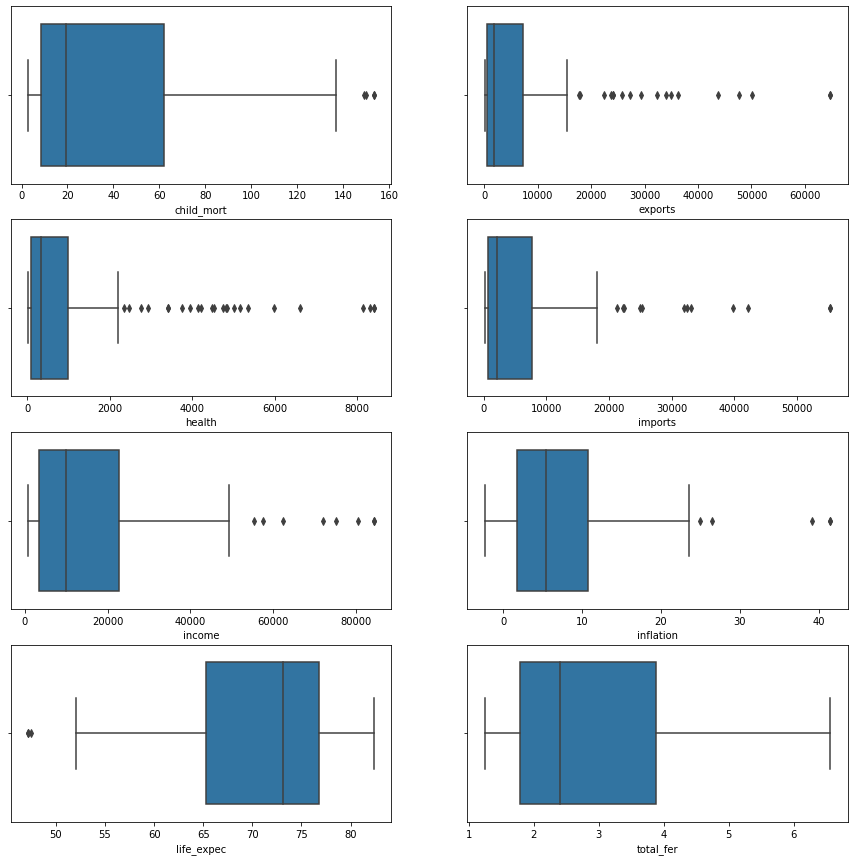

In [146]:
 plt.figure(figsize=(15,15))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features): 
    ax = plt.subplot(4, 2, i[0]+1)
    sns.boxplot(x=i[1], data=df)
    #plt.xticks(rotation = 20)

In [147]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


# Hopkins statistic


In [0]:
#Calculating the Hopkins statistic
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) 
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

In [149]:
#Let's check the Hopkins measure
hopkins(df)

0.9616804956575313

In [78]:
# 2. rescaling
from sklearn.preprocessing import StandardScaler
standard_scaler = StandardScaler()
df = standard_scaler.fit_transform(df)
df = pd.DataFrame(df)
df.columns = ['child_mort',	'exports'	,'health',	'imports'	,'income',	'inflation','life_expec',	'total_fer',	'gdpp']
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,1.344012,-0.569638,-0.566983,-0.598844,-0.851772,0.263649,-1.693799,1.926928,-0.702314
1,-0.547543,-0.473873,-0.440417,-0.413679,-0.387025,-0.375251,0.663053,-0.865911,-0.498775
2,-0.272548,-0.424015,-0.486295,-0.476198,-0.221124,1.123260,0.686504,-0.035427,-0.477483
3,2.084186,-0.381264,-0.534113,-0.464070,-0.612136,1.936405,-1.236499,2.154642,-0.531000
4,-0.709457,-0.086754,-0.178431,0.139659,0.125202,-0.768917,0.721681,-0.544433,-0.032079


# K- means Clustering

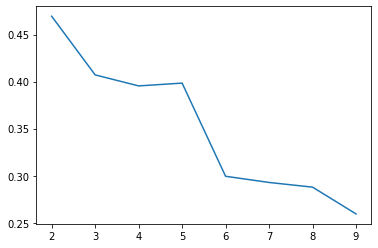

In [79]:
#First we'll do the silhouette score analysis
from sklearn.metrics import silhouette_score
ss = []
for k in range(2,10):
    kmeans = KMeans(n_clusters = k).fit(df)
    ss.append([k, silhouette_score(df, kmeans.labels_)])
    
plt.plot(pd.DataFrame(ss)[0], pd.DataFrame(ss)[1]);

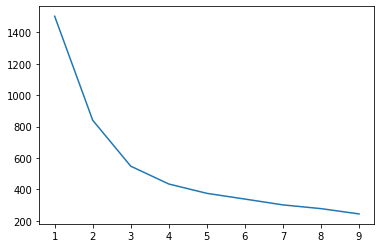

In [80]:
#Now let's proceed to the elbow curve method
ssd = []
for k in list(range(1,10)):
    model = KMeans(n_clusters = k, max_iter = 50).fit(df)
    ssd.append([k, model.inertia_])
    
plt.plot(pd.DataFrame(ssd)[0], pd.DataFrame(ssd)[1]);

In [150]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


In [151]:
#KMeans with the K the we have choosed
#Let's perform K means using K=3
kmean = KMeans(n_clusters = 3, max_iter = 50, random_state = 50)
kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=50,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=50, tol=0.0001, verbose=0)

In [0]:
## Let's make a copy of our original data before using it for analysis
df_org = df.copy()

In [153]:
kmean.labels_

array([0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 1, 1, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       2, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 1, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       2, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 1, 1, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [0]:
# Let's add the cluster Ids to the original data 
df_org['clus_id']=kmean.labels_
df_org['country']=df1['country']


In [0]:
df['clus_id']=kmean.labels_

In [165]:
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,clus_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


In [157]:
df_org.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,clus_id
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,Afghanistan,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,Albania,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,Algeria,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,Angola,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,Antigua and Barbuda,0


In [159]:
# Cross-check
df_org.isnull().sum()

child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
country       0
clus_id       0
dtype: int64

In [167]:
df_org['clus_id'].value_counts()

0    125
1     28
2     14
Name: clus_id, dtype: int64

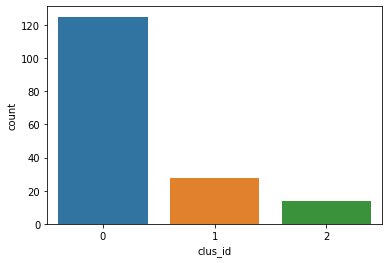

In [175]:
sns.countplot(df_org['clus_id'])

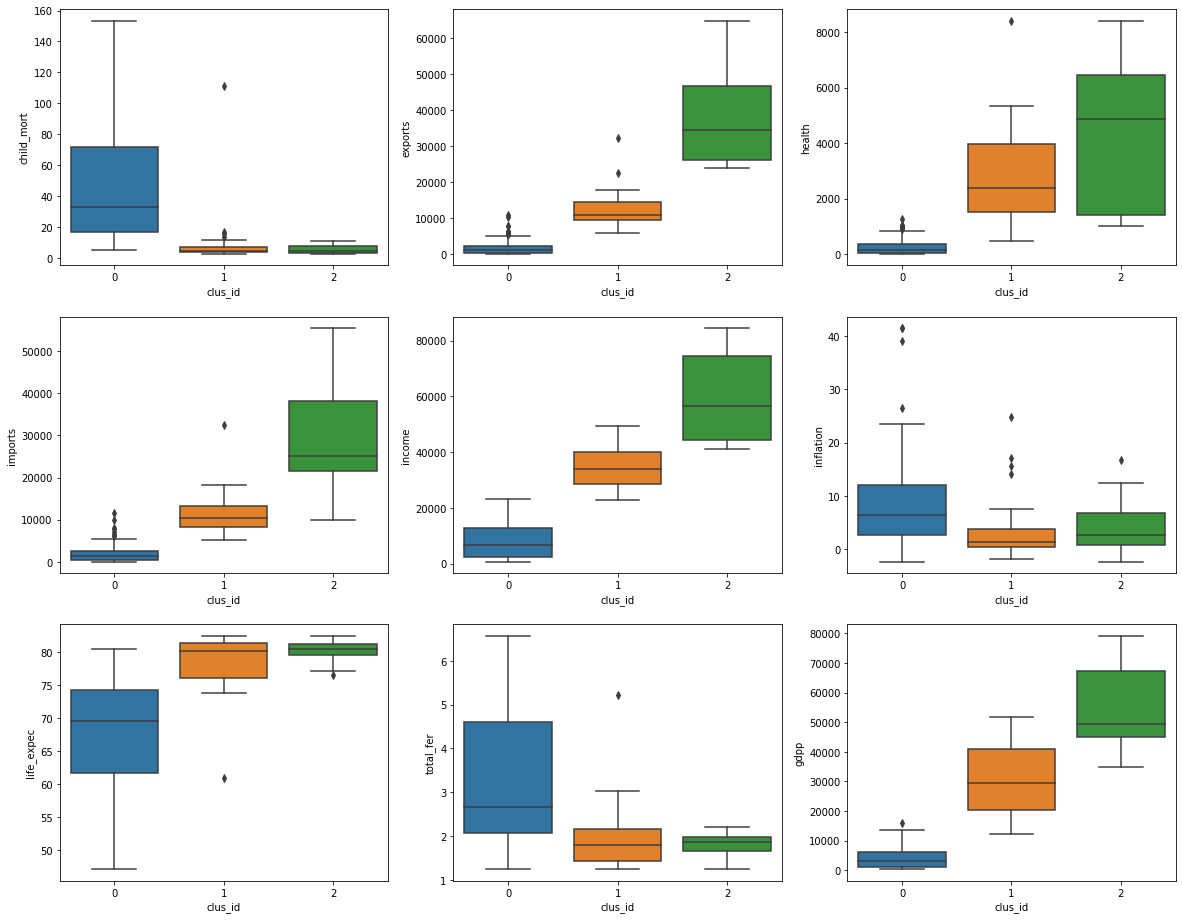

In [163]:
plt.figure(figsize=(20,50))
features = ['child_mort','exports','health','imports','income','inflation','life_expec','total_fer','gdpp']
for i in enumerate(features):
    ax = plt.subplot(9,3, i[0]+1)
    sns.boxplot(x='clus_id',y=i[1], data=df)
    plt.xticks(rotation = 0)

# Cluster Profiling

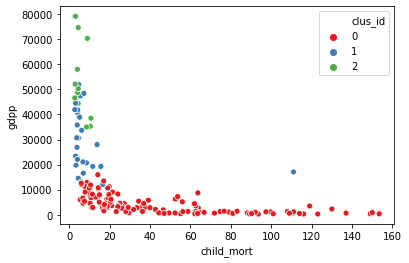

In [176]:
# Plot the Cluster with respect to the clusters obtained
sns.scatterplot(x = 'child_mort', y = 'gdpp', hue ='clus_id', legend = 'full', data = df, palette='Set1')

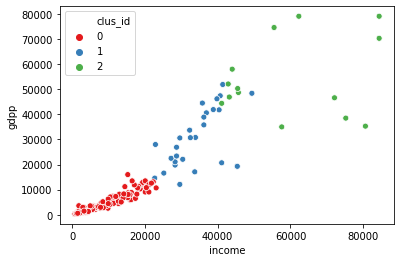

In [177]:
sns.scatterplot(x = 'income', y = 'gdpp', hue ='clus_id', legend = 'full', data = df, palette='Set1')

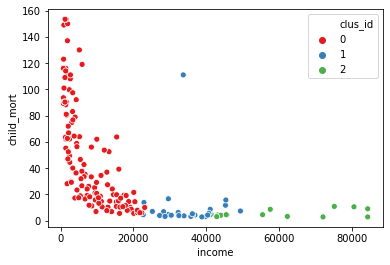

In [178]:
sns.scatterplot(x = 'income', y = 'child_mort', hue ='clus_id', legend = 'full', data = df, palette='Set1')

In [166]:
df.groupby('clus_id').mean()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
clus_id,,,,,,,,,
0,47.812800,1720.818023,274.157300,1905.112146,8156.307840,8.520570,67.807360,3.289578,4199.353920
1,9.882143,12372.542857,2802.931443,11803.292857,34335.714286,3.842821,78.609643,1.962257,30239.285714
2,5.485714,37883.658571,4521.885029,29450.070000,59603.428571,4.477443,80.055000,1.808800,54205.428571


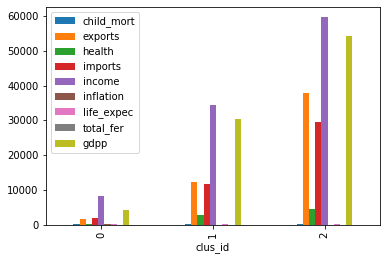

In [168]:
df.groupby('clus_id').mean().plot(kind='bar')

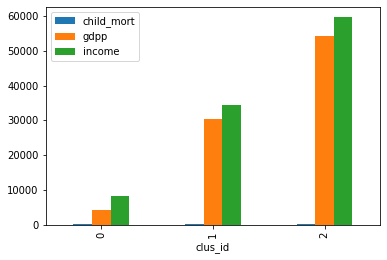

In [170]:
df[['child_mort','gdpp','income','clus_id']].groupby('clus_id').mean().plot(kind='bar')

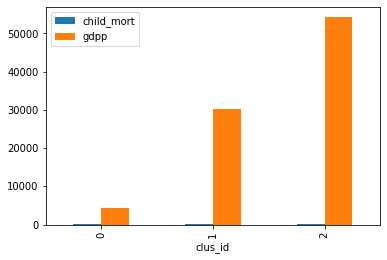

In [171]:
df[['child_mort','gdpp','clus_id']].groupby('clus_id').mean().plot(kind='bar')

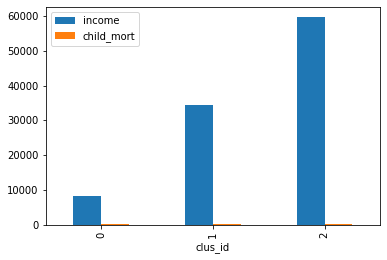

In [172]:
df[['income','child_mort','clus_id']].groupby('clus_id').mean().plot(kind='bar')

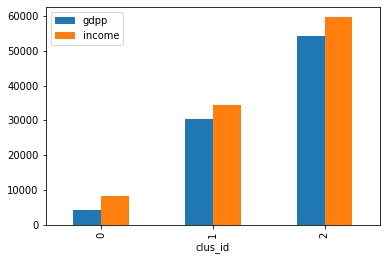

In [174]:
df[['gdpp','income','clus_id']].groupby('clus_id').mean().plot(kind='bar')

In [183]:
##### Based on the observations from the Scatter plot (gdpp , income , child_mort) , Barplots of individual features and cluster profle based on gdpp , income and child mortality we can conclude that cluster 0 represents the list of countries which are in dire need of financial aide.
# Top 10 countries consider gdpp , income and child_mort (respectively)
Top10Country_1=df_org[df_org['clus_id']==0]
Top10Country_1.sort_values(['gdpp','income','child_mort'], ascending=[True,True,False]).head(10)

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,clus_id
88,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,Liberia,0
26,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,Burundi,0
37,116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,"Congo, Dem. Rep.",0
112,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,Niger,0
132,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,Sierra Leone,0
93,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,Madagascar,0
106,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,Mozambique,0
31,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,Central African Republic,0
94,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,Malawi,0
50,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,Eritrea,0


**The following are the top 10 countries obtained through K means clustering which require financial aid**
1.	Liberia	
2.	Burundi	
3.	Congo, Dem. Rep.	
4.	Niger	
5.	Sierra Leone	
6.	Madagascar	
7.	Mozambique	
8.	Central African Republic	
9.	Malawi	
10.	Eritre

# Hierarchial Clustering

In [184]:
df=df.drop(['clus_id'], axis =1)
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0


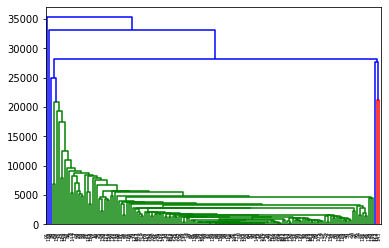

In [185]:
mergings = linkage(df, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

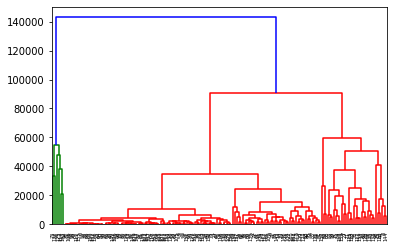

In [186]:
# complete linkage
mergings = linkage(df, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [189]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 2, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 2, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 2, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0])

In [190]:
# assign cluster labels
df['cluster_labels'] = cluster_labels
df.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,cluster_labels
0,90.2,55.30,41.9174,248.297,1610.0,9.44,56.2,5.82,553.0,0
1,16.6,1145.20,267.8950,1987.740,9930.0,4.49,76.3,1.65,4090.0,0
2,27.3,1712.64,185.9820,1400.440,12900.0,16.10,76.5,2.89,4460.0,0
3,119.0,2199.19,100.6050,1514.370,5900.0,22.40,60.1,6.16,3530.0,0
4,10.3,5551.00,735.6600,7185.800,19100.0,1.44,76.8,2.13,12200.0,0


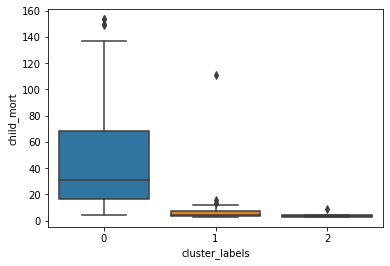

In [191]:
# plots
sns.boxplot(x='cluster_labels', y='child_mort', data=df)

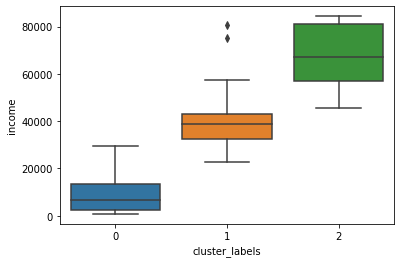

In [192]:
# plots
sns.boxplot(x='cluster_labels', y='income', data=df)

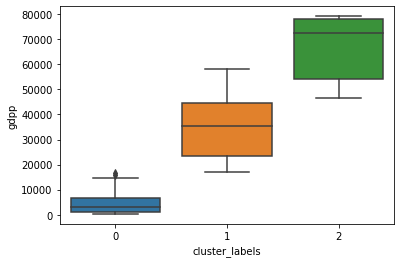

In [193]:
# plots
sns.boxplot(x='cluster_labels', y='gdpp', data=df)

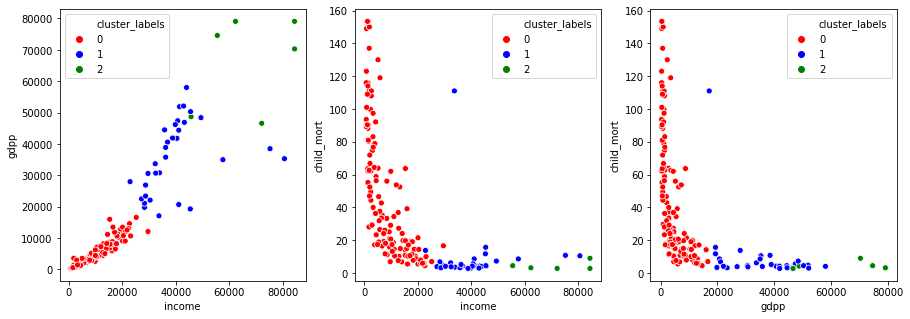

In [194]:
# Visualise the variations of gdpp , child mort and income on the basis of cluster labels

plt.figure(figsize = (15,5))

plt.subplot(1, 3, 1)
sns.scatterplot(x='income',y='gdpp',hue='cluster_labels',legend='full',data=df,palette=['red','blue','green'])
plt.subplot(1, 3, 2)
sns.scatterplot(x='income',y='child_mort',hue='cluster_labels',legend='full',data=df,palette=['red','blue','green'])
plt.subplot(1, 3, 3)
sns.scatterplot(x='gdpp',y='child_mort',hue='cluster_labels',legend='full',data=df,palette=['red','blue','green'])

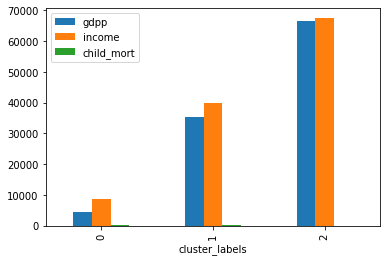

In [195]:
df[['gdpp','income', 'child_mort','cluster_labels']].groupby('cluster_labels').mean().plot(kind = 'bar')

In [0]:
df['country']=df_org['country']

In [200]:
#From the above visualisation we can infer that the most impacted countries (high child mortality , low gdpp and low income)
#belong to cluster 0
# Top 10 impacted countries through hierarchical clustering

Top10Country=df_org[df['cluster_labels']==0]
Top10Country.sort_values(['gdpp','income','child_mort'], ascending=[True,False,True]).head(10) 

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,country,clus_id
26,93.6,22.243716,26.796000,104.90964,764.00,12.30,57.7,6.2600,331.62,Burundi,0
88,89.3,62.457000,38.586000,302.80200,742.24,5.47,60.8,5.0200,331.62,Liberia,0
37,116.0,137.274000,26.419400,165.66400,742.24,20.80,57.5,6.5400,334.00,"Congo, Dem. Rep.",0
112,123.0,77.256000,17.956800,170.86800,814.00,2.55,58.8,6.5636,348.00,Niger,0
132,153.4,67.032000,52.269000,137.65500,1220.00,17.20,55.0,5.2000,399.00,Sierra Leone,0
93,62.2,103.250000,17.009362,177.59000,1390.00,8.79,60.8,4.6000,413.00,Madagascar,0
106,101.0,131.985000,21.829900,193.57800,918.00,7.64,54.5,5.5600,419.00,Mozambique,0
31,149.0,52.628000,17.750800,118.19000,888.00,2.01,47.5,5.2100,446.00,Central African Republic,0
94,90.5,104.652000,30.248100,160.19100,1030.00,12.10,53.1,5.3100,459.00,Malawi,0
50,55.2,23.087800,17.009362,112.30600,1420.00,11.60,61.7,4.6100,482.00,Eritrea,0


In [0]:
The following are the top 10 countries obtained through Hierarchical clustering which require financial aid

Burundi
Liberia
Democratic Republic of Congo
Niger
Sierra Leone
Madagascar
Mozambique
Central AFrican Republic
Malawi
Eritrea

#Conclusion

**Based on K-Means clustering and Hieerarchical clustering we can conclude that the following are the 10 most impacted countries to which financial aid needs to be disbursed.**

1.Burundi

2.Liberia

3.Democratic Republic of Congo

4.Niger

5.Sierra Leone

6.Madagascar

7.Mozambique

8.Central AFrican Republic

9.Malawi

10.Eritrea